In [60]:
# pip install scipy

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.special import spherical_yn, spherical_jn

In [15]:

m1 = 939.565 #MeV/c^2
m2 = 3727.379 #MeV/c^2
hbar = 197 #MeV

mu = m1*m2/(m1+m2)

V0 = -50.0 #MeV
a = 5 #fm

In [16]:
def calculate_phase_shift(k, K, l):

    ka = k * a
    Ka = K * a
    
    delta_l = np.arctan2( (K*spherical_jn(l,Ka,True)*spherical_jn(l,ka) - (k*spherical_jn(l,Ka)*spherical_jn(l,ka,True))) , (k*spherical_jn(l,Ka)*(-1)*spherical_yn(l,ka,True) - (K*spherical_jn(l,Ka,True)*(-1)*spherical_yn(l,ka))) )

    return delta_l
    

In [17]:
def calculate_total_cross_sections(E_values, l_max):
    cross_sections = []
    for E in E_values:
        k = np.sqrt((2*mu*E)/hbar**2)
        kappa = np.sqrt((2*mu*(E-V0))/hbar**2)
        total_cross_section = 0.
        for l in range(l_max + 1):
            delta_l = calculate_phase_shift(k, kappa, l)
            total_cross_section += (2*l + 1) * (np.sin(delta_l)) ** 2
        cross_sections.append((4*np.pi / (k ** 2)) * total_cross_section)
    return cross_sections

In [18]:
E_values = np.linspace(0.1, 20.0, 100)
l_max = 0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


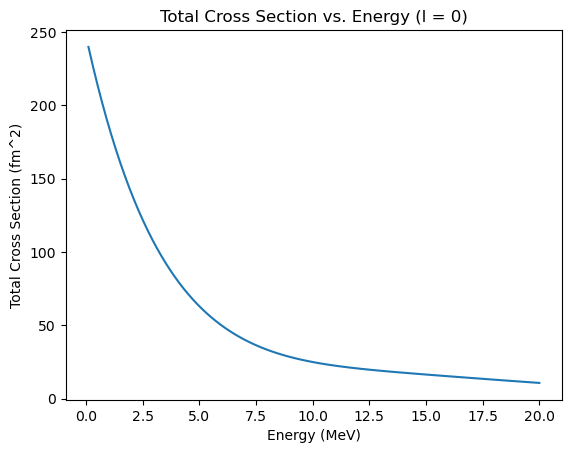

In [20]:
cross_sections = calculate_total_cross_sections(E_values, l_max)

sns.lineplot(x=E_values, y=cross_sections)
plt.xlabel("Energy (MeV)")
plt.ylabel("Total Cross Section (fm^2)")
plt.title(f"Total Cross Section vs. Energy (l = {l_max})")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


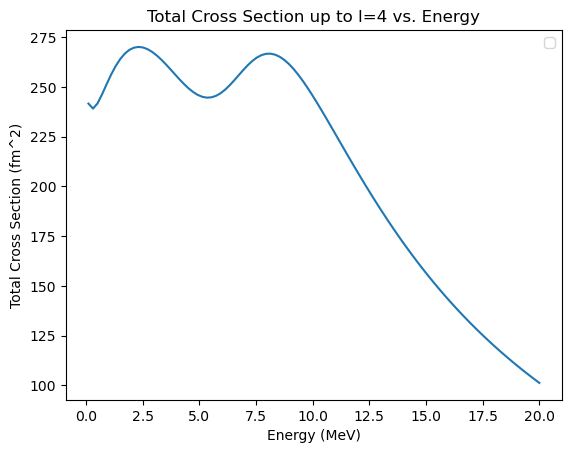

In [13]:

cross_sections_4 = calculate_total_cross_sections(E_values, 4)

plt.plot(E_values, cross_sections_4)
plt.xlabel("Energy (MeV)")
plt.ylabel("Total Cross Section (fm^2)")
plt.title("Total Cross Section up to l=4 vs. Energy")
plt.legend()
plt.show()

In [67]:
k_array = np.sqrt(2*mu*E_values / (hbar ** 2))
kappa_array = np.sqrt((2*mu*(E_values-V0))/hbar**2)

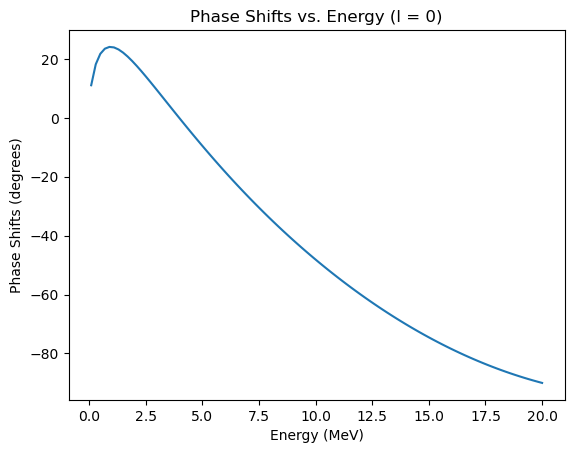

In [68]:
l = 0
phase_shifts = calculate_phase_shift(k_array, kappa_array, l) * 180 / np.pi

plt.plot(E_values, phase_shifts)
plt.xlabel("Energy (MeV)")
plt.ylabel("Phase Shifts (degrees)")
plt.title(f"Phase Shifts vs. Energy (l = {l})")
plt.show()

## Styled Plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


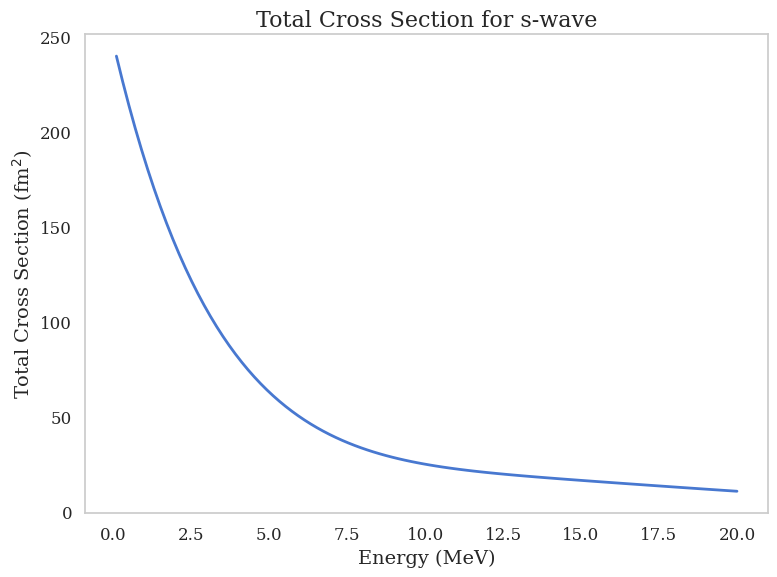

In [27]:
cross_sections = calculate_total_cross_sections(E_values, l_max)

# Set Seaborn style for a clean and professional look
sns.set(style="whitegrid", palette="muted")

# Set font properties for a professional look
mpl.rcParams.update({
    'font.size': 14, 
    'font.family': 'serif',
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})

# Create the Seaborn line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=E_values, y=cross_sections, linewidth=2)

# Customize plot labels and title
plt.xlabel("Energy (MeV)", fontsize=14)
plt.ylabel("Total Cross Section (fm$^2$)", fontsize=14)
plt.title("Total Cross Section for s-wave", fontsize=16)

plt.grid(False)

# Show the plot
plt.tight_layout()  # Ensures labels and titles fit well
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


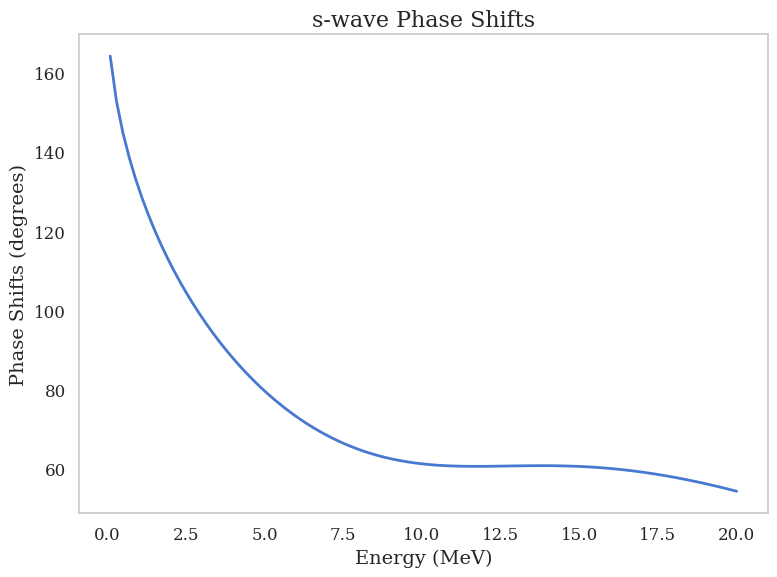

In [28]:
k_array = np.sqrt(2*mu*E_values / (hbar ** 2))
kappa_array = np.sqrt((2*mu*(E_values-V0))/hbar**2)

l = 0
phase_shifts = calculate_phase_shift(k_array, kappa_array, l) * 180 / np.pi

sns.set(style="whitegrid", palette="muted")
mpl.rcParams.update({
    'font.size': 14, 
    'font.family': 'serif',
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})

plt.figure(figsize=(8, 6))
sns.lineplot(x=E_values, y=phase_shifts, linewidth=2)
plt.xlabel("Energy (MeV)", fontsize=14)
plt.ylabel("Phase Shifts (degrees)", fontsize=14)
plt.title("s-wave Phase Shifts", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()
